# Data Exploration

In [39]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

df = pd.read_csv('out.csv')

In [40]:
rwoba, pwoba = stats.pearsonr(df['wobadiff (2023)'], df['ops_change 2023-2024'])
rslg, pslg = stats.pearsonr(df['xslgdiff (2023)'], df['ops_change 2023-2024'])
adjusted_df = df[['xhrdiff (2023)', 'ops_change 2023-2024']].dropna()
rhr, phr = stats.pearsonr(adjusted_df['xhrdiff (2023)'], adjusted_df['ops_change 2023-2024'])
rba, pba = stats.pearsonr(df['xbadiff (2023)'], df['ops_change 2023-2024'])
adjusted_df = df[['babipdiff (2023)', 'ops_change 2023-2024']].dropna()
rbabip, pbabip = stats.pearsonr(adjusted_df['babipdiff (2023)'], adjusted_df['ops_change 2023-2024'])
  
data = {
    '%ΔOPS vs wOBA-xwOBA': [rwoba, rwoba**2, pwoba],
    '%ΔOPS vs SLG - xSLG': [rslg, rslg**2, pslg], 
    '%ΔOPS vs BA - xBA': [rba, rba**2, pba],
    '%ΔOPS vs HR - xHR': [rhr, rhr**2, phr],
    '%ΔOPS vs 2023 BABIP - Career BABIP': [rbabip, rbabip**2, pbabip]
}

values_df = pd.DataFrame.from_dict(data, orient='index', columns=['r', 'r^2', 'p'])
values_df.rename_axis("graph", inplace=True)
display(values_df)

,r,r^2,p
graph,,,
%ΔOPS vs wOBA-xwOBA,-0.454729,0.206779,5.861345e-12
%ΔOPS vs SLG - xSLG,-0.422607,0.178596,2.251576e-10
%ΔOPS vs BA - xBA,-0.422587,0.178580,2.256196e-10
%ΔOPS vs HR - xHR,-0.228158,0.052056,1.123589e-03
%ΔOPS vs 2023 BABIP - Career BABIP,-0.266697,0.071127,5.348332e-04


In [41]:
features = df[['wobadiff (2023)', 'xbadiff (2023)', 'xslgdiff (2023)', 'babipdiff (2023)', 'xhrdiff (2023)']]
display(features.corr()) # searching for multicollinearity

vif = pd.DataFrame()
vif['features'] = features.columns
vif["Variance Inflation Factor Value"] = [variance_inflation_factor(features.dropna().values, i) for i in range(5)]
display(vif)

,wobadiff (2023),xbadiff (2023),xslgdiff (2023),babipdiff (2023),xhrdiff (2023)
wobadiff (2023),1.000000,0.911554,0.963237,0.347980,0.212506
xbadiff (2023),0.911554,1.000000,0.786144,0.433661,0.073472
xslgdiff (2023),0.963237,0.786144,1.000000,0.268041,0.261247
babipdiff (2023),0.347980,0.433661,0.268041,1.000000,-0.112334
xhrdiff (2023),0.212506,0.073472,0.261247,-0.112334,1.000000


,features,Variance Inflation Factor Value
0,wobadiff (2023),33.235548
1,xbadiff (2023),7.894996
2,xslgdiff (2023),17.246879
3,babipdiff (2023),1.286952
4,xhrdiff (2023),1.214620


<Figure size 640x480 with 0 Axes>

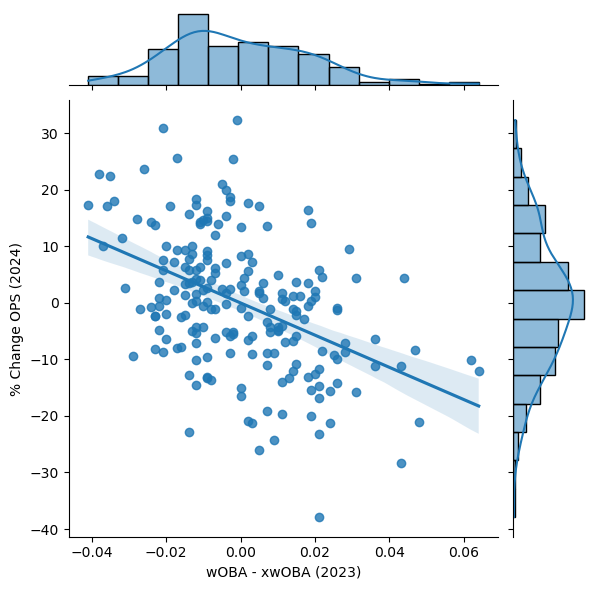

<Figure size 640x480 with 0 Axes>

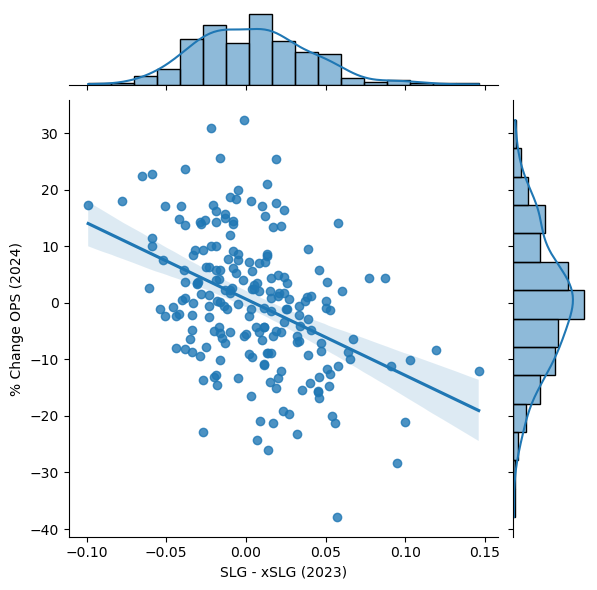

<Figure size 640x480 with 0 Axes>

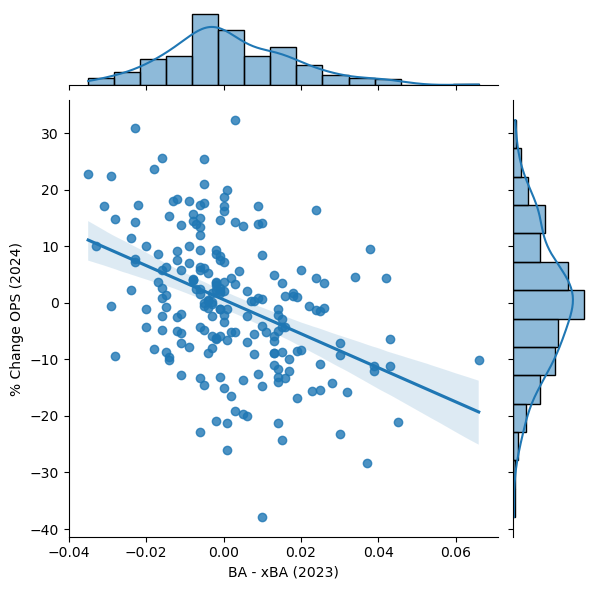

<Figure size 640x480 with 0 Axes>

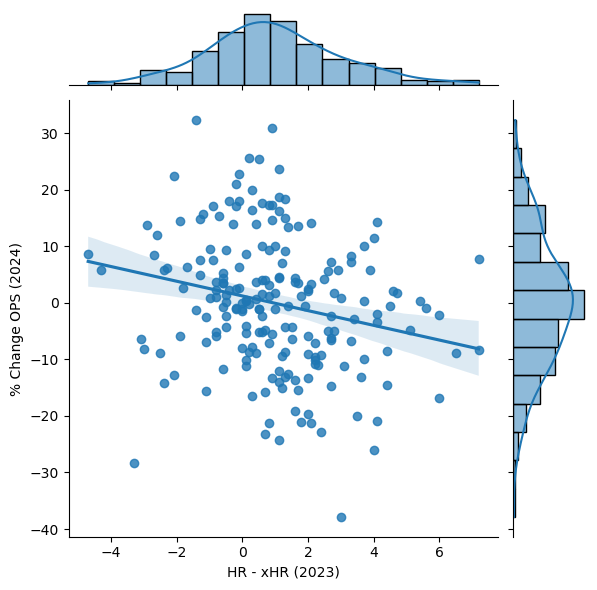

<Figure size 640x480 with 0 Axes>

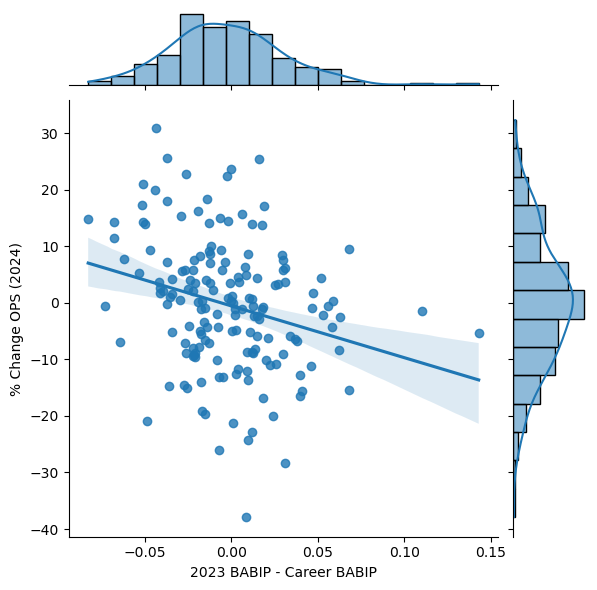

In [42]:
plt.figure()
sb.jointplot(x='wobadiff (2023)', y='ops_change 2023-2024', data=df, kind='reg')
plt.xlabel('wOBA - xwOBA (2023)'); plt.ylabel('% Change OPS (2024)');

plt.figure()
sb.jointplot(x='xslgdiff (2023)', y='ops_change 2023-2024', data=df, kind='reg')
plt.xlabel('SLG - xSLG (2023)'); plt.ylabel('% Change OPS (2024)');

plt.figure()
sb.jointplot(x='xbadiff (2023)', y='ops_change 2023-2024', data=df, kind='reg')
plt.xlabel('BA - xBA (2023)'); plt.ylabel('% Change OPS (2024)');
 
plt.figure()
sb.jointplot(x='xhrdiff (2023)', y='ops_change 2023-2024', data=df, kind='reg')
plt.xlabel('HR - xHR (2023)'); plt.ylabel('% Change OPS (2024)');

plt.figure()
sb.jointplot(x='babipdiff (2023)', y='ops_change 2023-2024', data=df, kind='reg')
plt.xlabel('2023 BABIP - Career BABIP'); plt.ylabel('% Change OPS (2024)'); 